# **Network Intrusion Detection using Linear Discriminant Analysis and CNN with Adam Optimizer**

---



## **Data Preprocessing**

In [13]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# importing dataset
data = pd.read_csv('/content/drive/MyDrive/NIDS/Dataset/KDDTrain+.txt',header=None, names=col_names)

In [17]:
# print dataset
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [18]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [19]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

Number of Classes: 23



normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

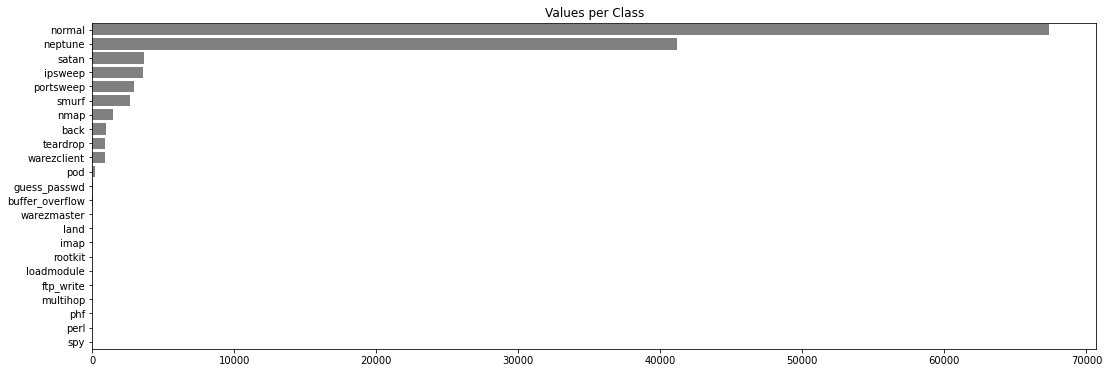

In [21]:
# number of attack labels 
print('Number of Classes:', data['label'].nunique())
print('')
label_counts = data['label'].value_counts()
plt.figure(figsize=(18,6));
sns.barplot(y=label_counts.index, x=label_counts.values, color='Grey');
plt.title('Values per Class');
display(label_counts)

In [22]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [23]:
# calling change_label() function
change_label(data)

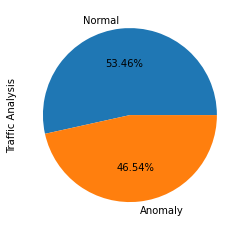

In [24]:
#binary traffic proportions
binary_class = []
for label in data['label']:
    if label !='normal':
        binary_class.append('Anomaly')
    else:
        binary_class.append('Normal')
binary_class = pd.Series(binary_class)
plt.figure()
binary_class.value_counts().plot(kind='pie', label='Traffic Analysis', autopct='%.2f%%' );

In [25]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [26]:
data['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [27]:
data['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [28]:
#how many different categories in column 'service'
print('number of categories in column \'service\':', data['service'].nunique())

number of categories in column 'service': 70


In [29]:
data['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

### **Data Normalization**

In [30]:
numeric_col = []
cat_col = []
for column in data.columns:
    if data[column].dtype != 'object':
        numeric_col.append(column)
    else:
        cat_col.append(column)

cat_col = cat_col[:-1]       
label=data['label'].unique()
#column 'num_outbound_cmds' is zero everywhere, we will delete it
data.drop(columns='num_outbound_cmds', inplace=True)

#remove from list of numeric columns
numeric_col.remove('num_outbound_cmds')

In [31]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [32]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [33]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [34]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [35]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


,class,label
0,Dos,0
1,Probe,1
2,R2L,2
3,U2R,3
4,normal,4


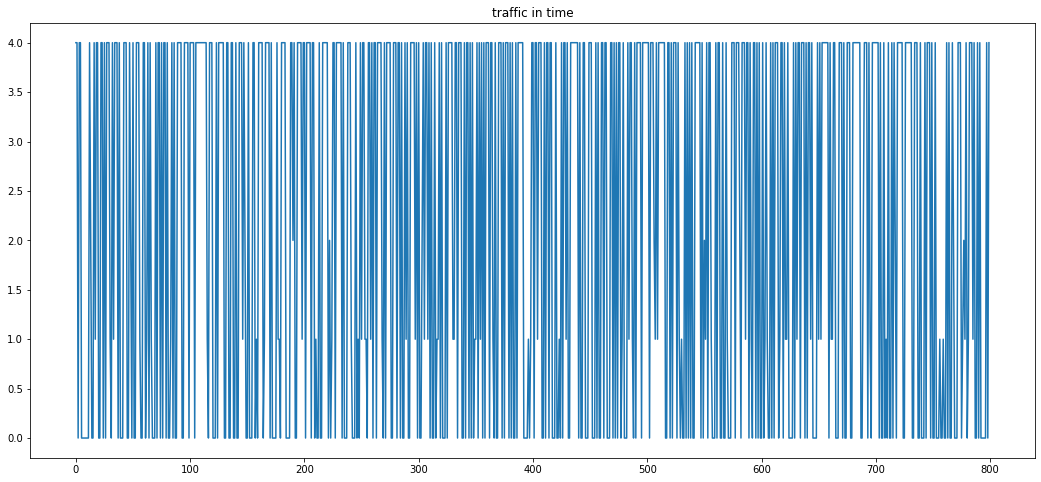

In [36]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(data['label'])
x = np.arange(y.shape[0])

plt.figure(figsize=(18,8));
sns.lineplot(x=x[:800], y=y[:800]); #for visual clarity, only a small slice is selected
plt.title('traffic in time')

class_labels = pd.DataFrame(data=enc.classes_,columns=['class'])
class_labels['label'] = np.unique(y)
display(class_labels)

### **One-hot-encoding**

In [37]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [38]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [39]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### **Binary Classification**

In [40]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [41]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [42]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [43]:
np.save("/content/drive/MyDrive/NIDS/labels/le1_classes.npy",le1.classes_,allow_pickle=True)

In [44]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [45]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal


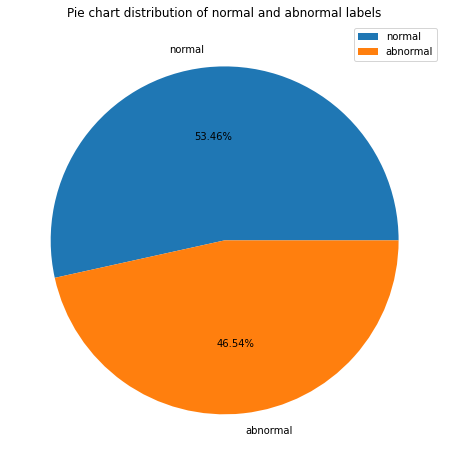

In [46]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig('/content/drive/MyDrive/NIDS/plots/Pie_chart_binary.png')
plt.show()

### **Multi-class Classification**

In [47]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [48]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [49]:
np.save("/content/drive/MyDrive/NIDS/labels/le2_classes.npy",le2.classes_,allow_pickle=True)

In [50]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


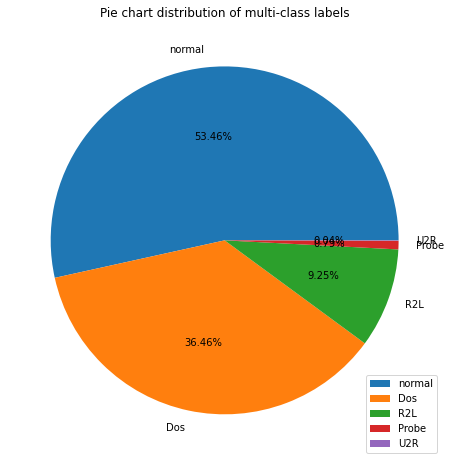

In [51]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('/content/drive/MyDrive/NIDS/plots/Pie_chart_multi.png')
plt.show()

#### Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from pandas_profiling import ProfileReport

In [54]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [55]:
train=pd.read_csv('/content/drive/MyDrive/NIDS/Dataset/KDDTrain+.txt',sep=',')
test=pd.read_csv('/content/drive/MyDrive/NIDS/Dataset/KDDTest+.txt',sep=',')

In [56]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [57]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [58]:
len(columns)

43

In [59]:
train.columns=columns
test.columns=columns

In [60]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [61]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [64]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [65]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [66]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [67]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [68]:
train.shape

(125972, 44)

In [70]:
profile = ProfileReport(train, title="Report_Train", html={'style' : {'full_width':True}})
profile.to_file(output_file="report_train.html")

TypeError: ignored

In [ ]:
profile = ProfileReport(test, title="Repot_Test", html={'style' : {'full_width':True}})
profile.to_file(output_file="report_test.html")

##### Basic Exploratory Analysis

In [ ]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

In [ ]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

In [ ]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

In [ ]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

In [ ]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

###### identifying relationships (between Y & numerical independent variables by comparing means)

In [ ]:
train.groupby('attack_class').mean().T

###### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

In [ ]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [ ]:
numeric_var_names

In [ ]:
cat_var_names

In [ ]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

In [ ]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

##### Data Audit Report

In [ ]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [ ]:
num_summary

In [ ]:
num_summary.to_csv('num_summary.csv')

##### Handling Outlier

In [ ]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

###### No missing in train dataset . So , Missing treatment not required .

In [ ]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [ ]:
cat_summary

##### Dummy Variable Creation

In [ ]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [ ]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

##### Final file for analysis

In [ ]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

In [ ]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

In [ ]:
corrm.to_csv('corrm.csv')

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

###### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [ ]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

In [ ]:
sns.heatmap(train_new.corr())

###### Variable reduction using Select K-Best technique

In [ ]:
X = train_new[train_new.columns.difference(['attack_class'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

In [ ]:
X_new.get_support()

In [ ]:
X_new.scores_

In [ ]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

##### Final list of variable selected for the model building using Select KBest

attack_neptune, attack_normal, attack_satan, count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_same_srv_rate, dst_host_srv_count, flag_S0, flag_SF, last_flag, logged_in, same_srv_rate, serror_rate, service_http

In [ ]:
train=train_new
test=test_new

### **Feature Extraction**

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [ ]:
# saving final dataset to disk
bin_data.to_csv("/content/drive/MyDrive/NIDS/bin_data.csv")
# final dataset for binary classification
bin_data

In [ ]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [ ]:
# saving final dataset to disk
multi_data.to_csv('/content/drive/MyDrive/NIDS/multi_data.csv')

# final dataset for multi-class classification
multi_data

## **Model Building**

In [ ]:
top_features=['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http']
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

### Discriminant Analysis

### **Linear Discriminant Analysis (Binary Classification)**

In [ ]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [ ]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [ ]:
pkl_filename = "/content/drive/MyDrive/NIDS/models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03292690671238966
Mean Squared Error -  0.03292690671238966
Root Mean Squared Error -  0.1814577270671868
R2 Score -  86.8001441639753
Accuracy -  96.70730932876104


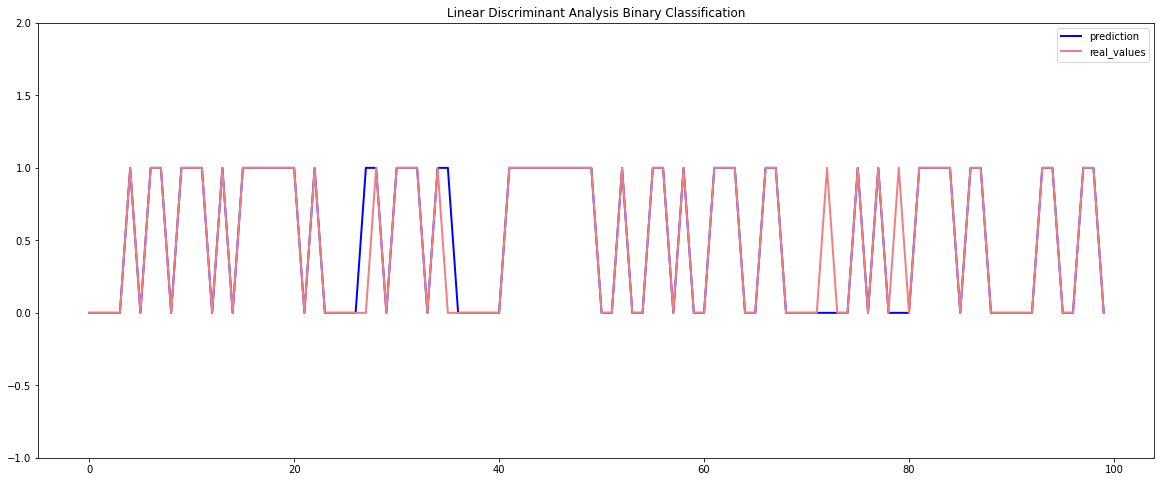

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear Discriminant Analysis Binary Classification")
plt.savefig('/content/drive/MyDrive/NIDS/plots/lda_real_pred_bin.png')
plt.show()

### **Linear Discriminant Analysis (Multi-class Classification)**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis()

In [ ]:
pkl_filename = "/content/drive/MyDrive/NIDS/models/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_,labels=[0,1,2,3,4]))

              precision    recall  f1-score   support

         Dos       0.97      0.96      0.96     14720
       Probe       0.96      0.98      0.97     16774
         R2L       0.00      0.00      0.00         0
         U2R       0.00      0.00      0.00         0
      normal       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97     31494
   macro avg       0.39      0.39      0.39     31494
weighted avg       0.97      0.97      0.97     31494



In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03292690671238966
Mean Squared Error -  0.03292690671238966
Root Mean Squared Error -  0.1814577270671868
R2 Score -  86.8001441639753
Accuracy -  96.70730932876104


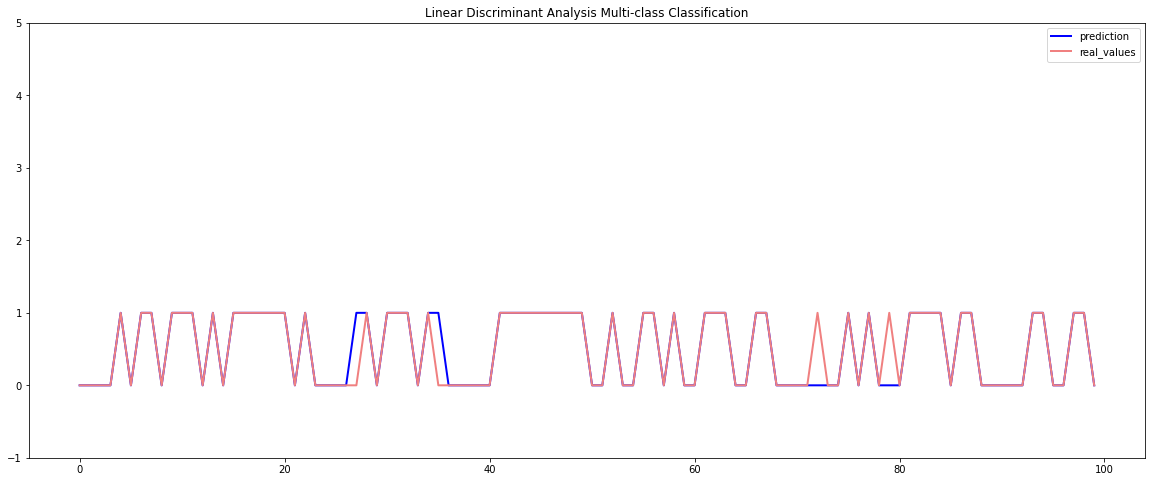

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear Discriminant Analysis Multi-class Classification")
plt.savefig('/content/drive/MyDrive/NIDS/plots/lda_real_pred_multi.png')
plt.show()

### **CNN Classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
#from tensorflow.keras.layers.core import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
#from tensorflow.keras.metrics import 

In [ ]:
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(data[cat_col])
x = pd.concat((data[numeric_col], dummies), axis=1).values

enc_bin = LabelEncoder()
y_bin = enc_bin.fit_transform(binary_class)
enc_multi = LabelEncoder()
y_multi = enc_multi.fit_transform(data['label'].values)

# for manual train_test_split, splitting indices instead of actual values
np.random.RandomState(seed=0)
train_indexes = np.random.choice(np.arange(x.shape[0]), size=x.shape[0]*8//10, replace=False)
test_indexes = np.delete(np.arange(x.shape[0]), np.arange(x.shape[0])[train_indexes])
print('train size:', train_indexes.shape[0])
print('test size:  ', test_indexes.shape[0])

x_tr = x[train_indexes]
x_ts = x[test_indexes]
y_bin_tr =y_bin[train_indexes]
y_bin_ts =y_bin[test_indexes]
y_multi_tr = y_multi[train_indexes]
y_multi_ts = y_multi[test_indexes]

# scale x
sc=StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_ts = sc.transform(x_ts)

#make x 3-dimensional for the CNN to process
x_tr = x_tr[:,:,np.newaxis]
x_ts = x_ts[:,:,np.newaxis]

train size: 100778
test size:   25195


In [ ]:
model=Sequential()
model.add(Conv1D(128,2, activation='relu',input_shape=x_tr[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(256,2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 120, 128)          384       
                                                                 
 batch_normalization (BatchN  (None, 120, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 59, 256)           65792     
                                                                 
 batch_normalization_1 (Batc  (None, 59, 256)          1

In [ ]:
early_stop = EarlyStopping(patience=5,verbose=1)
model.fit(x_tr, y_bin_tr, epochs=50, validation_split=0.1, batch_size=16, callbacks=[early_stop])

Epoch 1/50
5669/5669 [==============================] - 204s 36ms/step - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.0218 - val_accuracy: 0.9930
Epoch 2/50
5669/5669 [==============================] - 201s 35ms/step - loss: 0.0258 - accuracy: 0.9906 - val_loss: 0.0162 - val_accuracy: 0.9934
Epoch 3/50
5669/5669 [==============================] - 204s 36ms/step - loss: 0.0255 - accuracy: 0.9903 - val_loss: 0.0180 - val_accuracy: 0.9938
Epoch 4/50
5669/5669 [==============================] - 199s 35ms/step - loss: 0.0249 - accuracy: 0.9909 - val_loss: 0.0185 - val_accuracy: 0.9930
Epoch 5/50
5669/5669 [==============================] - 201s 35ms/step - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.0255 - val_accuracy: 0.9909
Epoch 6/50
5669/5669 [==============================] - 200s 35ms/step - loss: 0.0245 - accuracy: 0.9907 - val_loss: 0.0204 - val_accuracy: 0.9933
Epoch 7/50
5669/5669 [==============================] - 215s 38ms/step - loss: 0.0238 - accuracy: 0.9913 - val_loss: 0

In [ ]:
pred = model.predict(x_ts)
pred_d = []
for prediction in pred:
    if prediction <0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)
        
pred = np.array(pred_d)
print('accuracy:', accuracy_score(y_bin_ts, pred))
print('f1-score:', f1_score(y_bin_ts, pred, average='macro'))

788/788 [==============================] - 10s 12ms/step
accuracy: 0.9920222266322684
f1-score: 0.9919867675866578


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

#standardize data
df_num = data[numeric_col].copy()
sc = StandardScaler()
df_num = sc.fit_transform(df_num)

#ordinalize labels
ordinal = OrdinalEncoder()
ord_labels = ordinal.fit_transform(data['label'].values[:,np.newaxis])
ord_labels = np.squeeze(ord_labels.astype(int))

#PCA
pca = PCA()
df_pca = pca.fit_transform(df_num)

In [ ]:
# create our target classifications
from sklearn.model_selection import train_test_split
le = LabelEncoder()
X = data.drop('label', axis=1)
y = le.fit_transform(data['label'])
df_num = data[numeric_col].copy()
df_num = sc.fit_transform(df_num)
df_num = pca.fit_transform(df_num)
# build the training sets
X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.2)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)

# calculate and display our base accuracty
lda_score = accuracy_score(lda_predictions,y_test)
lda_score

0.9348283389561421

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(y_test,lda_predictions,labels=[4,0],target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.94      0.94      0.94     13474
      normal       0.98      0.95      0.97      9184

   micro avg       0.96      0.95      0.95     22658
   macro avg       0.96      0.95      0.96     22658
weighted avg       0.96      0.95      0.95     22658



              precision    recall  f1-score   support

         Dos       0.98      0.95      0.97      9184
       Probe       0.78      0.83      0.81      2344
         R2L       0.49      0.80      0.61       184
         U2R       0.10      0.33      0.16         9
      normal       0.94      0.94      0.94     13474

    accuracy                           0.93     25195
   macro avg       0.66      0.77      0.70     25195
weighted avg       0.94      0.93      0.94     25195



Text(42.0, 0.5, 'Truth')

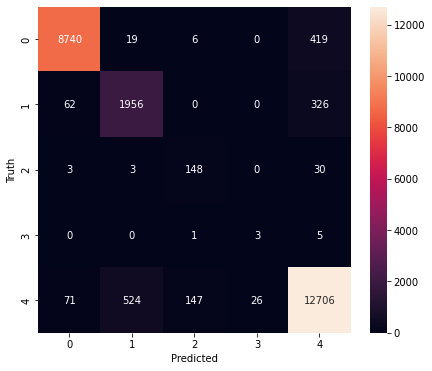

In [ ]:
print(classification_report(y_test,lda_predictions,target_names=le2.classes_))
cm = tf.math.confusion_matrix(y_test, lda_predictions)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

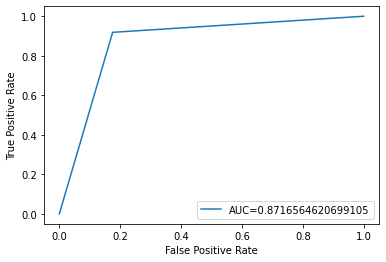

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,lda_predictions)
auc = metrics.roc_auc_score(y_test,lda_predictions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Save Model and Load Model

In [ ]:
import pickle
# Saving CNN model to disk
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
import numpy as np
sp = [[1,0,0,239,0.06,0.00,0.04,10,0,0,21,0,0.04,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
sp = np.asarray(sp).astype(np.float32)
model=pickle.load(open('model.pkl', 'rb'))
model.predict(sp)

1/1 [==============================] - 0s 132ms/step


array([[1.695272e-08]], dtype=float32)